# Covid-19 Data Analysis in India (End of Jan,2020 to First of Aug, 2021)

## Importing libaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Taking Data -> Source https://www.kaggle.com/datasets/sudalairajkumar/covid19-in-india?select=covid_19_india.csv

In [2]:
df = pd.read_csv('./data/covid_19_india.csv')
df

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
18105,18106,2021-08-11,8:00 AM,Telangana,-,-,638410,3831,650353
18106,18107,2021-08-11,8:00 AM,Tripura,-,-,77811,773,80660
18107,18108,2021-08-11,8:00 AM,Uttarakhand,-,-,334650,7368,342462
18108,18109,2021-08-11,8:00 AM,Uttar Pradesh,-,-,1685492,22775,1708812


## Explore Data

In [3]:
df.info() ## Very important note their is no null values in the whole df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       18110 non-null  int64 
 1   Date                      18110 non-null  object
 2   Time                      18110 non-null  object
 3   State/UnionTerritory      18110 non-null  object
 4   ConfirmedIndianNational   18110 non-null  object
 5   ConfirmedForeignNational  18110 non-null  object
 6   Cured                     18110 non-null  int64 
 7   Deaths                    18110 non-null  int64 
 8   Confirmed                 18110 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


In [4]:
df.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [5]:
df.shape

(18110, 9)

## Cleaning and managing data

### Date conversion

In [6]:
df.Date = pd.to_datetime(df.Date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Sno                       18110 non-null  int64         
 1   Date                      18110 non-null  datetime64[ns]
 2   Time                      18110 non-null  object        
 3   State/UnionTerritory      18110 non-null  object        
 4   ConfirmedIndianNational   18110 non-null  object        
 5   ConfirmedForeignNational  18110 non-null  object        
 6   Cured                     18110 non-null  int64         
 7   Deaths                    18110 non-null  int64         
 8   Confirmed                 18110 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 1.2+ MB


### Add year-month col

In [7]:
df['year-month'] = df.Date.map(lambda x: x.strftime('%Y-%m'))

## Questions

### 1. Trend of total (national + foreign) cases in India

In [8]:
df.head(3)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,year-month
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1,2020-01
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1,2020-01
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2,2020-02


In [9]:
total_confirm_cases_date_wise = df.groupby('Date')['Confirmed'].sum()

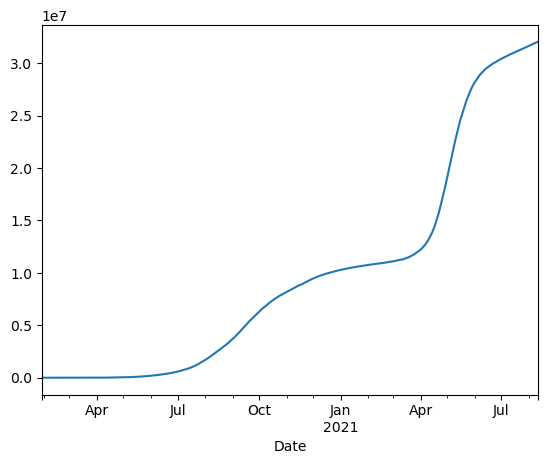

In [10]:
total_confirm_cases_date_wise.plot(title='Trend of total confirmed corona cases in India',
                                  xlabel=''
                                  );  # in the scale of 1e7 -> 1cr

In [12]:
df[df['Date'] == '2021-08'].Confirmed.sum() # total cases in india in 2021-august -> 3.1 cr

31655824